# INF 2178 Midterm Submission 
# Kamilah Ebrahim 

Expectation for the Midterm Submission: 

1. Clean Diabetes dataset using tidy data principles. There is not a lot of cleaning necessary but think about what each column means. Do they make sense?

2. Conduct Exploratory Data Analysis using Visualizations and t-tests to test your initial hypotheses/research questions. Your RQs can and will morph and change appropriately as you go through the process of analysis.

3. Conduct Multiple Linear Regression and ANOVA modeling on the dataset. What do each modeling step reveal?

I am more concerned with your process than than specific right outcomes (though of course, they are secondarily important)

Write up: Write in detail the steps that you took to clean the data and why. Justify why you think your model is the right solution. If you feel like there were solutions that you identified but couldn't achieve, please write that out as well. There are no page limits.


# Workplace Setup and Data Import

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [50]:
from scipy import stats

In [44]:
!pip install inflection
import inflection


In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [60]:
import researchpy as rp
import scipy.stats as stats


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from sklearn import linear_model
import seaborn as sns

!pip install scikit_posthocs
!pip install researchpy
import researchpy as rp

     |████████████████████████████████| 43 kB 1.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-py3-none-any.whl size=37903 sha256=fbc6bb562918ce36d87194846db4c23973991d35003ad2d6e42eebcbde64c00f
  Stored in directory: /root/.cache/pip/wheels/b8/21/e6/f39794d4a6ee3d3cc5146ca80b5cd949452ad4a8fde9f6b9fc
Successfully built scikit-posthocs


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
data = pd.read_csv('/content/drive/My Drive/diabetes.csv')

# 1. Clean Dataset Using Tidy Data Principles 
Code Adapted From: 
INF 2178 Class notes/github and 
https://realpython.com/python-data-cleaning-numpy-pandas/#dropping-columns-in-a-dataframe and 
https://www.kaggle.com/code/dylanyves/diabetes-prediction-detailed-beginner-notebook

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [19]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [17]:
print(f'Total na values\n\n{df.isna().sum()}')

Total na values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [18]:
print(f'Total duplicated data: {df.duplicated().sum()}')

Total duplicated data: 0


In [20]:
df.dtypes.value_counts()

int64      7
float64    2
dtype: int64

# 2. EDA, Visualizations, and t-tests 

These boxplots help to better understand the data overall and the relationships between the variables and the outcome, and are an important initial step in the EDA process. 

In [22]:
fig = make_subplots(cols=4, rows=2, subplot_titles=(df.columns))

fig.add_trace(go.Box(x=df.Pregnancies), row=1, col=1)
fig.add_trace(go.Box(x=df.Glucose), row=1, col=2)
fig.add_trace(go.Box(x=df.BloodPressure), row=1, col=3)
fig.add_trace(go.Box(x=df.SkinThickness), row=1, col=4)

fig.add_trace(go.Box(x=df.Insulin), row=2, col=1)
fig.add_trace(go.Box(x=df.BMI), row=2, col=2)
fig.add_trace(go.Box(x=df.DiabetesPedigreeFunction), row=2, col=3)
fig.add_trace(go.Box(x=df.Age), row=2, col=4)

In [46]:
column_list = list(data.columns)

for i, col in enumerate(column_list):
  column_list[i] = inflection.underscore(col)

data.columns = column_list

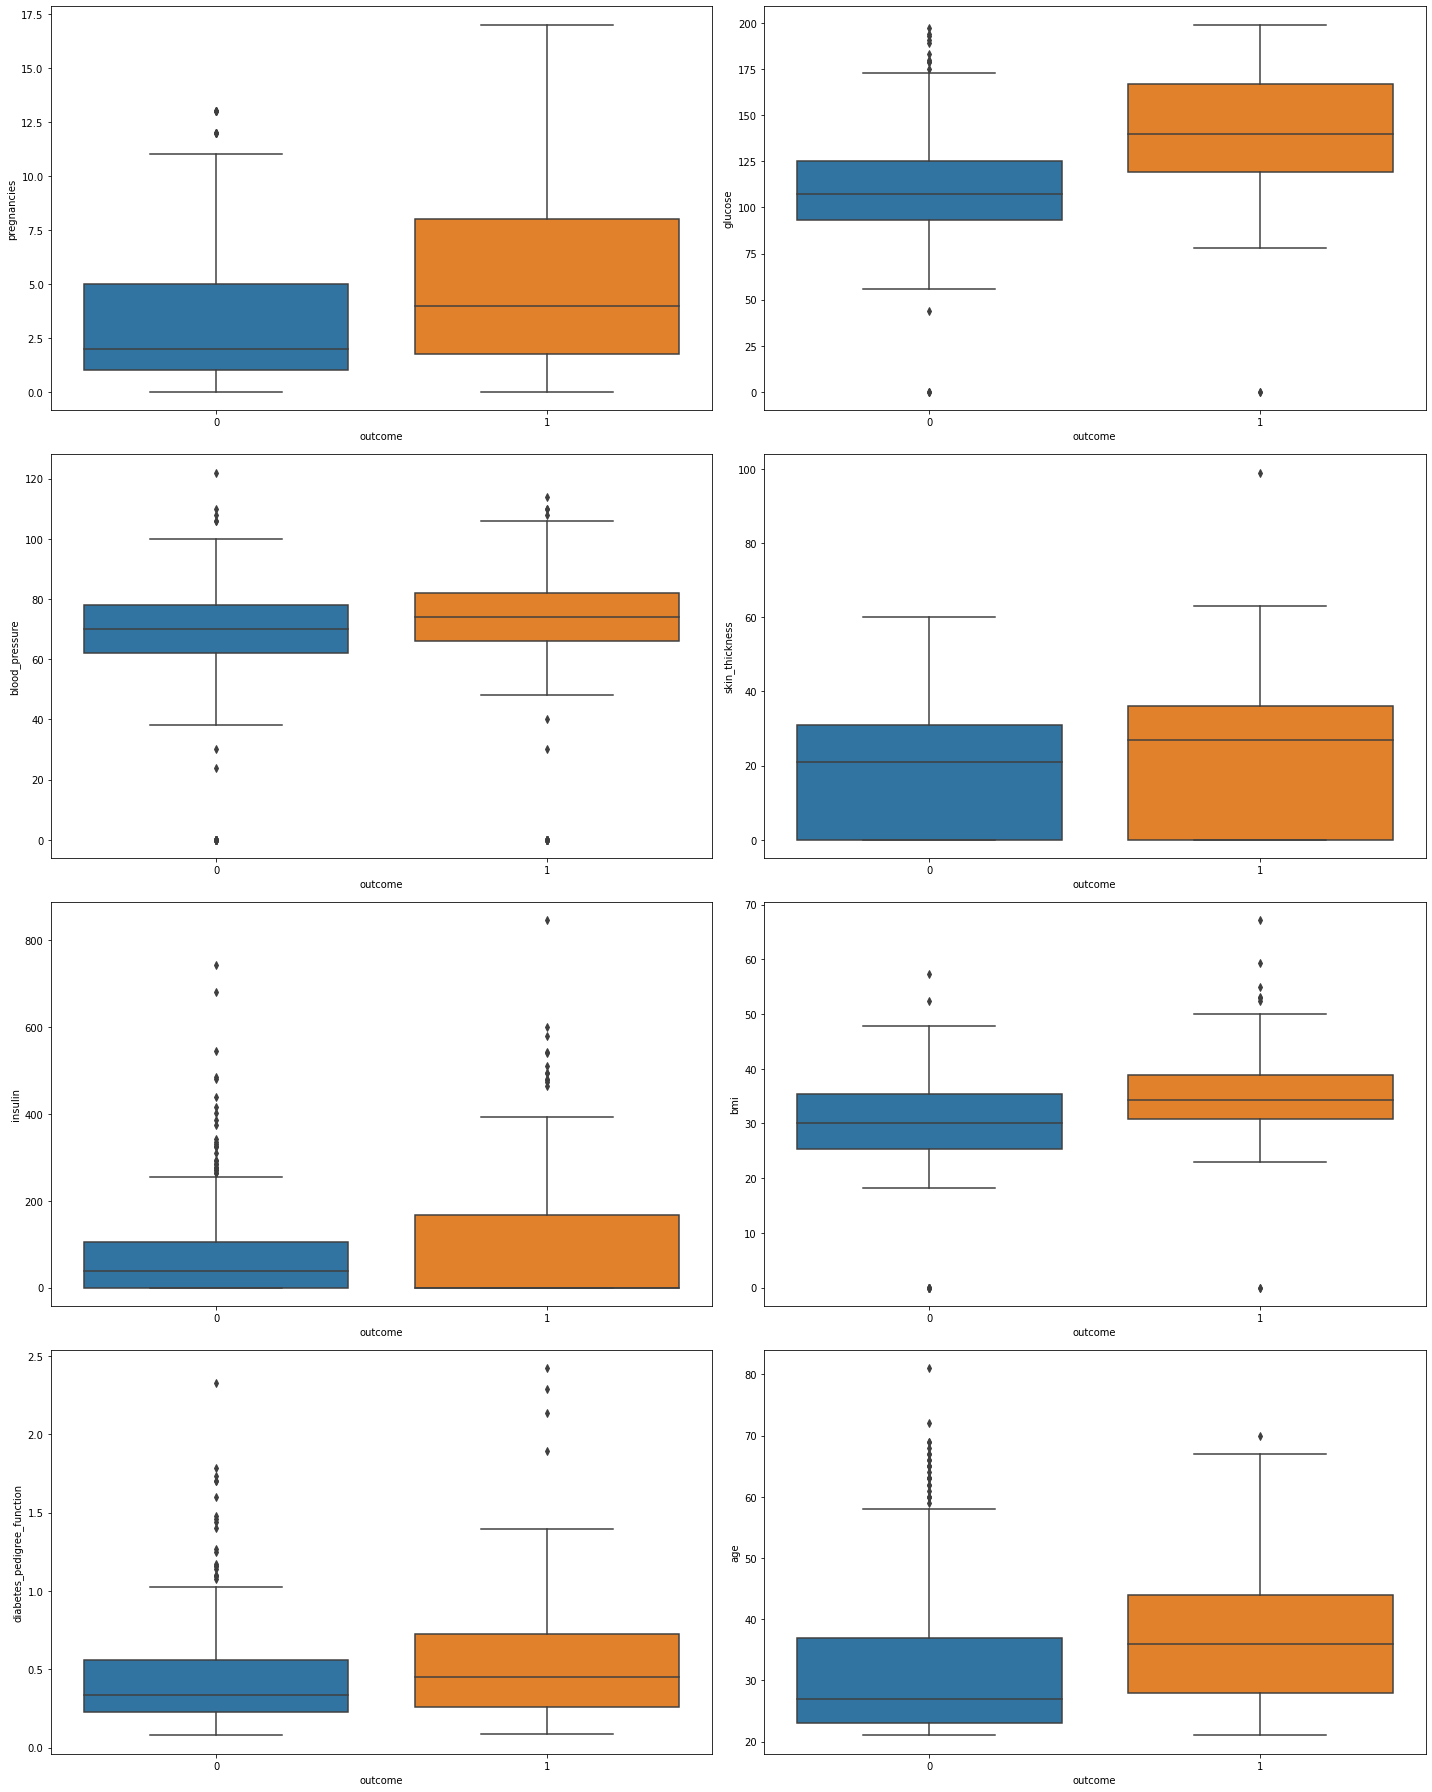

In [48]:
fig, ax = plt.subplots(4, 2, figsize=(20,25))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_list[:-1]):
  sns.boxplot(data=data, x='outcome', y=col, ax=axes_list[i])

plt.tight_layout()
plt.show()

EDA: heatmap to see which variables are most correlated with one another 
It appears as though Glucose, BMI, and Age are the most correlated with the Outcome variable. This is an important finding and will help inform the research questions in this section. 

In [21]:
corr = df.corr()
fig = px.imshow(corr)
fig.show()

Now I will plot the variables most correlated with the Outcome variable with each other to further investigate their relationship. 

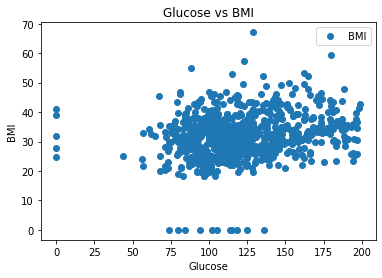

In [33]:
df.plot(x='Glucose', y='BMI', style='o')
plt.title('Glucose vs BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

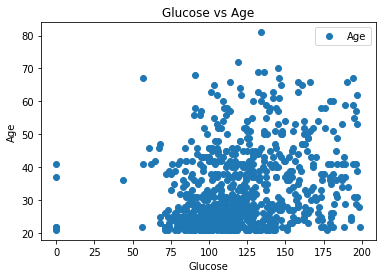

In [35]:
df.plot(x='Glucose', y='Age', style='o')
plt.title('Glucose vs Age')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.show()

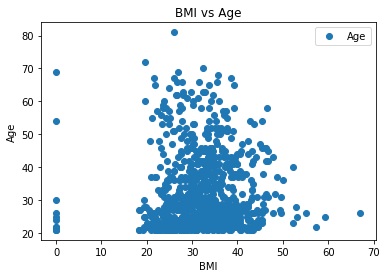

In [36]:
df.plot(x='BMI', y='Age', style='o')
plt.title('BMI vs Age')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

At this point, my understanding of the data is grounded enough to form research questions: 

1) Can a diabetes outcome be explained by Glucose levels? 
2) Can a diabetes outcome be explained by BMI?

In [90]:
NewGlucose = pd.Series(["Low", "High"], dtype = "category")

df["NewGlucose"] = NewGlucose

df.loc[df["Glucose"] <= 125, "NewGlucose"] = NewGlucose[0]

df.loc[df["Glucose"] > 124, "NewGlucose"] = NewGlucose[1]

In [91]:
mod = ols('Outcome ~ NewGlucose',
                data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df          F        PR(>F)
NewGlucose   29.970467    1.0  158.86502  3.098368e-33
Residual    144.508700  766.0        NaN           NaN


In [92]:
pair_t = mod.t_test_pairwise('NewGlucose')
pair_t.result_frame

coef   std err          t         P>|t|  Conf. Int. Low  \
Low-High -0.402429  0.031928 -12.604167  3.098368e-33       -0.465106   

          Conf. Int. Upp.  pvalue-hs  reject-hs  
Low-High        -0.339752        0.0       True

In [93]:
NewBMI = pd.Series(["Low", "High"], dtype = "category")

df["NewBMI"] = NewBMI

df.loc[df["BMI"] <= 30, "NewBMI"] = NewBMI[0]

df.loc[df["BMI"] > 29, "NewBMI"] = NewBMI[1]

In [94]:
mod = ols('Outcome ~ NewBMI',
                data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

              sum_sq     df          F        PR(>F)
NewBMI     15.265903    1.0  73.446655  5.665584e-17
Residual  159.213264  766.0        NaN           NaN


In [95]:
pair_t = mod.t_test_pairwise('NewBMI')
pair_t.result_frame

coef   std err         t         P>|t|  Conf. Int. Low  \
Low-High -0.296575  0.034606 -8.570102  5.665584e-17       -0.364509   

          Conf. Int. Upp.     pvalue-hs  reject-hs  
Low-High        -0.228642  1.110223e-16       True

# Linear Regression and Anova Modelling

In [76]:
# test all the variables as explanatory variables

model1 = ols('Outcome ~ Pregnancies+Glucose+BloodPressure+SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+Age', df).fit()
table1 = sm.stats.anova_lm(model2, type=2)
table1

df      sum_sq    mean_sq           F  \
Pregnancies                 1.0    8.591143   8.591143   53.638189   
Glucose                     1.0   34.020758  34.020758  212.406175   
BloodPressure               1.0    0.123476   0.123476    0.770911   
SkinThickness               1.0    0.863789   0.863789    5.393003   
Insulin                     1.0    0.255349   0.255349    1.594251   
BMI                         1.0    6.780158   6.780158   42.331432   
DiabetesPedigreeFunction    1.0    1.817752   1.817752   11.349002   
Age                         1.0    0.458924   0.458924    2.865257   
Residual                  759.0  121.567819   0.160168         NaN   

                                PR(>F)  
Pregnancies               6.164705e-13  
Glucose                   1.327103e-42  
BloodPressure             3.802132e-01  
SkinThickness             2.048132e-02  
Insulin                   2.071077e-01  
BMI                       1.398272e-10  
DiabetesPedigreeFunction  7.929848e-04  
Age                       9.092163e-02  
Residual                           NaN

In [79]:
df1 = table1[table1['PR(>F)'] < 0.05]

df1

df     sum_sq    mean_sq           F        PR(>F)
Pregnancies               1.0   8.591143   8.591143   53.638189  6.164705e-13
Glucose                   1.0  34.020758  34.020758  212.406175  1.327103e-42
SkinThickness             1.0   0.863789   0.863789    5.393003  2.048132e-02
BMI                       1.0   6.780158   6.780158   42.331432  1.398272e-10
DiabetesPedigreeFunction  1.0   1.817752   1.817752   11.349002  7.929848e-04

In [81]:
# test the variables of interest as explanatory variables

model2 = ols('Outcome ~ Glucose+BMI+Age', df).fit()
table2 = sm.stats.anova_lm(model2, type=2)
table2

df      sum_sq    mean_sq           F        PR(>F)
Glucose     1.0   37.983801  37.983801  228.119379  2.702802e-45
BMI         1.0    6.590809   6.590809   39.582431  5.293274e-10
Age         1.0    2.692113   2.692113   16.168030  6.371564e-05
Residual  764.0  127.212444   0.166508         NaN           NaN

In [82]:
df2 = table2[table2['PR(>F)'] < 0.05]
df2

df     sum_sq    mean_sq           F        PR(>F)
Glucose  1.0  37.983801  37.983801  228.119379  2.702802e-45
BMI      1.0   6.590809   6.590809   39.582431  5.293274e-10
Age      1.0   2.692113   2.692113   16.168030  6.371564e-05